# Schrodinger's Equation

## References -- move to bottom
* Atkins & Friedman (Molecular Quantum Mechanics textbook)
* Barba, Lorena A., et al. "MAE 6286 Practical Numerical Methods with Python." The George Washington University. http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about. 2014
* http://arxiv.org/pdf/0704.3240.pdf
* http://phys.au.dk/fileadmin/site_files/publikationer/phd/Thomas_Kim_Kjeldsen.pdf
* https://en.wikipedia.org/wiki/Wave_packet
* https://en.wikipedia.org/wiki/Schr%C3%B6dinger_equation

Wave functions are used in quantum mechanics to describe the position of a particle at a certain time. The fundamental equation used to solve these wave functions is the Schrodinger equation. 

\begin{equation}
i\hbar\frac{\partial}{\partial t}\psi(x, t) = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}\psi(x, t)
\end{equation}

Discretized Equation:

\begin{eqnarray}
i\hbar\frac{\psi^{n+1}_i - \psi^n_i}{\Delta t} = \frac{\hbar^2}{2m} \cdot \frac{1}{2} &\left( 
\frac{\psi^{n+1}_{i+1} - 2\psi^{n+1}_i + \psi^{n+1}_{i-1}}{\Delta x^2} 
+ \frac{\psi^n_{i+1}-2\psi^n_i + \psi^n_{i-1}}{\Delta x^2}
\right)
\end{eqnarray}

In [1]:
import numpy
from scipy.linalg import solve
from scipy.interpolate import spline
from matplotlib import pyplot
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Set initial conditions

L = 1                               # Length of box [m]
nx = 51                             # Number of spatial grid points in L 

h = 6.62607004e-34                  # Planck's Constant [m^2*kg/s]
hbar = h/(2*numpy.pi)               # h/2pi
m = 9.10938356e-31                  # Mass of an electron [kg]
dx = L/(nx-1)                       # Distance between each spatial grid point [m]

sigma = 0.5 
dt = (2*m*dx**2)/(70*hbar*sigma)    # Time step [s]
nt = 20                             # Number of time steps

In [3]:
def generateMatrix(N, sigma):
    
    """Creates a tridiagonal matrix which uses the
    Crank-Nicolson method to solve Schrodinger's Equation.
    Sets foundation for second order derivative.
    
    Parameters:
    ----------
    N: int
        Number of discretization points
    sigma: float
        sigma = dx^x/(a*dt)
        
    Returns:
    ----------
    A: tridiagonal matrix of floats set with a diagonal 
        with upper and lower diagonal elements used for 
        Schrodinger's equation
    """
   
    # Set center diagonal
    #d = 2*numpy.diag(numpy.ones(N-2)*(1-1/sigma))
    #d = -2*numpy.diag(numpy.ones(N-2)*(1/(dx**2)))
    d = -2*numpy.diag(numpy.ones(N-2)*(1/sigma))
       
    # Set Upper Diagonal
    #ud = numpy.diag(numpy.ones(N-3)*-1j, 1)
    #ud = numpy.diag(numpy.ones(N-3)*(-1/(dx**2)), 1)
    ud = numpy.diag(numpy.ones(N-3)*(-1/sigma), 1)
        
    # Set Lower Diagonal
    #ld = numpy.diag(numpy.ones(N-3)*-1j, -1)
    #ld = numpy.diag(numpy.ones(N-3)*(-1/(dx**2)), -1)
    ld = numpy.diag(numpy.ones(N-3)*(-1/sigma), -1)
        
    A = d + ud + ld
    
    return A                   

In [4]:
def generateRHS(psi, sigma):
    
    """
    Computes the right hand side of Schrodinger's Equation
    Set Dirichlet boundary conditions at i = 0 and i = -1
    
    Parameters:
    ----------
    psi: array of float
        Value of wave equation at specific time step
    sigma: float
        sigma = dx^x/(a*dt)
        
    Returns:
    ----------
    b = array of float
        Right-hand side of Schrodinger's equation
    """
    
    b = psi[1:-1]*2*(-1-1j/sigma) + psi[:-2] + psi[2:]
    
    #Dirichlet boundary conditions
    b[0] = psi[0]
    b[-1] = psi[0]
    
    return b

In [5]:
def CrankNicolson(psi, A, nt, sigma):
    
    """
    Uses the Crank-Nicolson method to compute 
    Schrodinger's equation
    
    Parameters:
    ----------
    psi: array of float
        initial values for wave equation
    A: tridiagonal matrix of floats set with a diagonal 
        with upper and lower diagonal elements used for 
        Schrodinger's equation 
    nt: int
        Time steps
    sigma: float
        sigma = dx^x/(a*dt)
    
    Returns:
    ----------
    psi: array of floats
        wave equation values through nt time steps
    """
    
    for t in range(nt):
        psi_n = psi.copy()
        b = generateRHS(psi_n, sigma)
        
        psi_inside = solve(A, b)
        psi[1:-1] = psi_inside
        
    return psi

In [7]:
# Initiate A matrix:

A = generateMatrix(nx, sigma)

In [7]:
# Initiate psi matrix and set as complex
psi_i = numpy.zeros(nx, dtype = numpy.complex)
psi_i[0] = 1


psi = CrankNicolson(psi_i.copy(), A, nt, sigma)

print(psi)

[  1.00000000e+00 +0.00000000e+00j   4.97187366e+52 -4.89395173e+52j
  -9.94374732e+52 +9.78790346e+52j   1.48763652e+53 -1.46432147e+53j
  -1.97502544e+53 +1.94407176e+53j   2.45461739e+53 -2.41614728e+53j
  -2.92451904e+53 +2.87868438e+53j   3.38287533e+53 -3.32985705e+53j
  -3.82787675e+53 +3.76788416e+53j   4.25776654e+53 -4.19103649e+53j
  -4.67084759e+53 +4.59764351e+53j   5.06548914e+53 -4.98610002e+53j
  -5.44013324e+53 +5.35487249e+53j   5.79330087e+53 -5.70250509e+53j
  -6.12359780e+53 +6.02762542e+53j   6.42972009e+53 -6.32895000e+53j
  -6.71045924e+53 +6.60528925e+53j   6.96470694e+53 -6.85555224e+53j
  -7.19145949e+53 +7.07875100e+53j   7.38982171e+53 -7.27400438e+53j
  -7.55901052e+53 +7.44054156e+53j   7.69835798e+53 -7.57770510e+53j
  -7.80731399e+53 +7.68495349e+53j   7.88544842e+53 -7.76186335e+53j
  -7.93245280e+53 +7.80813105e+53j   7.94814157e+53 -7.82357394e+53j
  -7.93245280e+53 +7.80813105e+53j   7.88544842e+53 -7.76186335e+53j
  -7.80731399e+53 +7.68495349e+53j

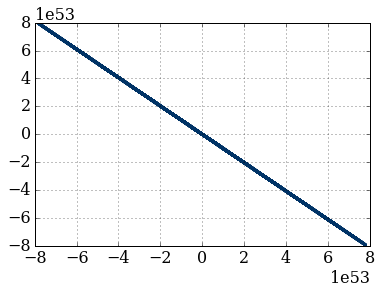

In [8]:
x = numpy.linspace(0,L,nx)

pyplot.plot(psi.imag, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

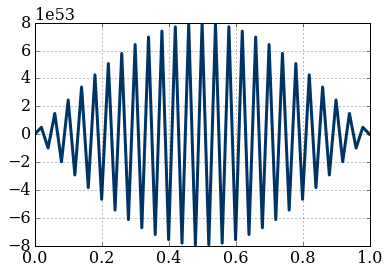

In [9]:
pyplot.plot(x, psi.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

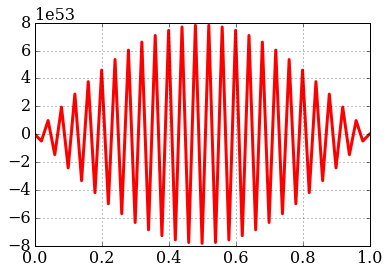

In [10]:
pyplot.plot(x, psi.imag, color='r', ls='-', lw=3);
pyplot.grid(True)

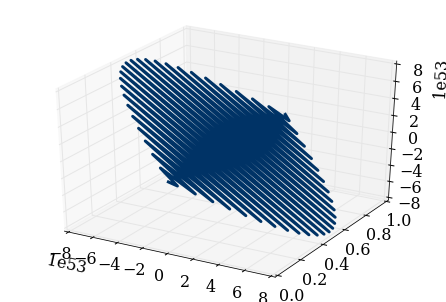

In [11]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.view_init()

ax.plot(psi.real, x, psi.imag, color = '#003366', lw =3)

In [ ]:
"""
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

fig = pyplot.figure();
ax = pyplot.axes(xlim = (0,L), ylim = (-5,5))
line, = ax.plot([],[],lw = 2)

def animate(data):
    x = numpy.linspace(0, L, nx)
    y = data
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames = psi.imag, interval = 50)

display_animation(anim, default_mode = 'once')
"""

In [ ]:
psi_conj = numpy.conj(psi)
probfunc = psi_conj*psi

#print(psi_conj)
#print()
#print(probfunc)
probfunc_real = probfunc.real
#print(probfunc_real)

In [ ]:
pyplot.plot(x, probfunc_real, color='#003366', ls='-', lw=3);
pyplot.grid(True)


In [ ]:
def psi_analytical(x, t, n_max, h, m, L, hbar):
    
    psi = 0
    for n in range (1, n_max+1):
        
        E = ((n**2)*(h**2))/(8*m*(L**2))
        
        summation = numpy.sqrt(2/L)*numpy.sin(n*numpy.pi*x/L)*numpy.exp(-1j*E*t/hbar)
        psi+= summation
        
    return psi


In [ ]:
psi_analytical = psi_analytical(x, dt*nt, 1, h, m, L, hbar)
#print(psi_analytical)

#print(psi_analytical.real)

In [ ]:
pyplot.plot(psi_analytical.imag, psi_analytical.real, color = '#003366', ls = '-', lw =3)

In [ ]:
pyplot.plot(x, psi_analytical.real, color = '#003366', ls = '-', lw =3)
pyplot.plot(x, psi_analytical.imag, color = 'r', ls = '-', lw =3)

In [ ]:
pyplot.plot(x, psi_analytical.imag, color = 'r', ls = '-', lw =3)

In [ ]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.view_init(45,45)

ax.plot(x, psi_analytical.imag, psi_analytical.real, color = '#003366', lw =3)
ax.set_xlabel(r'x')
ax.set_ylabel(r'psi_imaginary')
ax.set_zlabel(r'psi_real')
#ax = pyplot.axes(xlabel=('x'),ylabel=('Real'), zlabel=('Imaginary'));#

In [ ]:
probfunc_analytical = numpy.conj(psi_analytical)*psi_analytical
pyplot.plot(x, probfunc_analytical.real, color='#003366', ls='-', lw=3);
pyplot.grid(True)

In [ ]:
"""
fig = pylab.figure()
ax = Axes3D(fig)
ax.viewinit()

def animate(data):
    x = numpy.linspace(0, L, nx)
    y = data
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames = psi.real, interval = 50)

display_animation(anim, default_mode = 'once')
"""